# Install

In [ ]:
!pip install streamfuels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.1 MB/s eta 0:00:00
Cloning into 'StreamFuels'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 145 (delta 77), reused 94 (delta 33), pack-reused 0 (from 0)
Receiving objects: 100% (145/145), 99.58 KiB | 5.24 MiB/s, done.
Resolving deltas: 100% (77/77), done.
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  se

# Import DatasetLoader from StreamFuels

In [2]:
from streamfuels.datasets import DatasetLoader
loader = DatasetLoader()

# Additional libraries for this notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Yearly fuel sales by states dataset

Load the dataset:

In [5]:
result, flag = loader.yearly_sales_state()
df, metadata = loader.read_tsf(path_tsf=result)
df.head(5)

dataset downloaded at: ./yearly_fuel_sales_by_state.tsf


,series_name,start_timestamp,end_timestamp,state_code,product,series_value
0,T1,1980-01-01,2025-01-01,GO,ethanol,"[12076.0, 42150.0, 52305.0, 95502.0, 149512.0,..."
1,T2,1980-01-01,2025-01-01,DF,ethanol,"[13962.0, 36939.0, 45395.0, 74006.0, 100572.0,..."
2,T3,1980-01-01,2025-01-01,MT,ethanol,"[603.0, 8362.0, 9784.0, 27942.0, 54865.0, 7864..."
3,T4,1980-01-01,2025-01-01,SC,ethanol,"[5350.0, 37128.0, 55023.0, 105020.0, 153991.0,..."
4,T5,1980-01-01,2025-01-01,RS,ethanol,"[1567.0, 27800.0, 49302.0, 149076.0, 278949.0,..."


Metadata of the dataset "Yearly fuel sales by state":

In [6]:
metadata

{'frequency': 'monthly',
 'horizon': 5,
 'missing_values': False,
 'equal_length': True}

Location of the dataset in the TSF format:

In [7]:
result

'./yearly_fuel_sales_by_state.tsf'

Plot of an example:

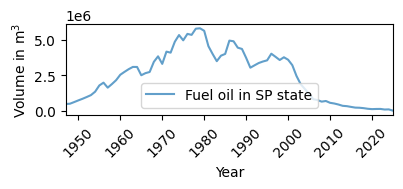

In [ ]:
i = np.random.randint(len(df))  # sort a random series

series = np.array(df.iloc[i]['series_value'])  # time series values
product = str.capitalize(df.iloc[i]['product']) # store the product´s name
state = df.iloc[i]['state_code'] # store the Brazilian state
start_timestamp = pd.to_datetime(df.iloc[i]['start_timestamp']) # When the series begins
end_timestamp = pd.to_datetime(df.iloc[i]['end_timestamp']) # When the series ends


# Generate the dates between the start and end timestamps
dates = pd.date_range(start=start_timestamp, periods=len(series), freq='YS')

plt.figure(figsize=(4, 2))
plt.plot(dates, series, alpha=0.7, label=f'{product} in {state} state')
plt.xlim(start_timestamp, end_timestamp)
plt.legend()
plt.ylabel('Volume in m$^3$')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('yearly_fuel_sales_state.png', dpi=300, bbox_inches='tight')

# Yearly fuel sales by city dataset

Load dataset (it can take several minutes, about 30 min):

In [13]:
result, flag = loader.yearly_sales_city()
df, metadata = loader.read_tsf(path_tsf=result)
df.head(5)

Preparing datasets:   0%|          | 0/9 [00:00<?, ?it/s]/content/StreamFuels/streamfuels/datasets/transform.py:623: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['GRANDE REGIÃO', 'UF', 'PRODUTO', 'MUNICÍPIO']] = df[['GRANDE REGIÃO', 'UF', 'PRODUTO', 'MUNICÍPIO']].applymap(parse_string)
Preparing datasets:  11%|█         | 1/9 [04:06<32:49, 246.16s/it]/content/StreamFuels/streamfuels/datasets/transform.py:623: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['GRANDE REGIÃO', 'UF', 'PRODUTO', 'MUNICÍPIO']] = df[['GRANDE REGIÃO', 'UF', 'PRODUTO', 'MUNICÍPIO']].applymap(parse_string)
Preparing datasets:  22%|██▏       | 2/9 [10:29<38:09, 327.03s/it]/content/StreamFuels/streamfuels/datasets/transform.py:623: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['GRANDE REGIÃO', 'UF', 'PRODUTO', 'MUNICÍPIO']] = df[['GRANDE REGIÃO', 'UF', 'PRODUTO', 'MUNICÍPIO']].applymap(parse_

dataset download at: ./yearly_fuel_sales_by_city.tsf


,series_name,start_timestamp,end_timestamp,state_code,city,product,series_value
0,T1,1992-01-01,2023-01-01,SP,saobernardodocampo,asphalt,"[6776.3551, 3882.3805, 6996.6, 3504.4585, 3412..."
1,T2,1992-01-01,2023-01-01,SP,saopaulo,asphalt,"[172243.8585, 56089.719, 24088.0195, 12795.894..."
2,T3,1992-01-01,2023-01-01,GO,goiania,asphalt,"[13632.3707, 16139.1122, 8061.9337, 5012.2771,..."
3,T4,1992-01-01,2023-01-01,RO,pimentabueno,asphalt,"[1092.439, 285.841, 765.9707, 340.2146, 572.01..."
4,T5,1992-01-01,2017-01-01,BA,mucuri,asphalt,"[1916.6683, 540.2293, 0.4878, 681.5333, 1362.5..."


Metadata of the dataset "Yearly fuel sales by city":

In [14]:
metadata

{'frequency': 'yearly',
 'horizon': 5,
 'missing_values': False,
 'equal_length': False}

Location of the dataset in the TSF format:

In [15]:
result

'./yearly_fuel_sales_by_city.tsf'

Plot of an example:

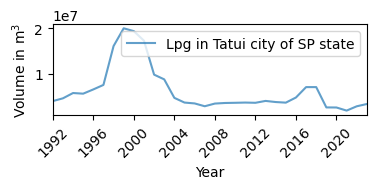

In [16]:
i = np.random.randint(len(df))  # sort a random series

series = np.array(df.iloc[i]['series_value'])  # time series values
product = str.capitalize(df.iloc[i]['product']) # store the product´s name
city = str.capitalize(df.iloc[i]['city']) # store the Brazilian city
state = df.iloc[i]['state_code'] # store the Brazilian state
start_timestamp = pd.to_datetime(df.iloc[i]['start_timestamp']) # When the series begins
end_timestamp = pd.to_datetime(df.iloc[i]['end_timestamp']) # When the series ends


# Generate the dates between the start and end timestamps
dates = pd.date_range(start=start_timestamp, periods=len(series), freq='YS')

plt.figure(figsize=(4, 2))
plt.plot(dates, series, alpha=0.7, label=f'{product} in {city} city of {state} state')
plt.xlim(start_timestamp, end_timestamp)
plt.legend()
plt.ylabel('Volume in m$^3$')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('yearly_fuel_sales_city.png', dpi=300, bbox_inches='tight')

# Monthly fuel sales by state dataset

Load dataset

In [9]:
result, flag = loader.monthly_sales_state()
df, metadata = loader.read_tsf(path_tsf=result)
df

dataset downloaded at: ./monthly_fuel_sales_by_state.tsf


,series_name,start_timestamp,end_timestamp,state_code,product,series_value
0,T1,1990-01-01,2025-03-01,GO,ethanol,"[29876.051, 21750.741, 20827.344, 27535.918, 1..."
1,T2,1990-01-01,2025-03-01,RO,diesel,"[31223.454, 59117.783, 37467.488, 66701.428, 3..."
2,T3,1990-01-01,2025-03-01,BA,diesel,"[128321.288, 94338.702, 92083.059, 132061.499,..."
3,T4,1990-01-01,2025-03-01,PI,LPG,"[8080.507246, 6561.634058, 7321.163043, 7498.6..."
4,T5,1990-01-01,2025-03-01,PR,diesel,"[153548.404, 144427.716, 171067.003, 234172.8,..."
...,...,...,...,...,...,...
211,T212,1990-01-01,2025-03-01,RO,fuel oil,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
212,T213,1990-01-01,2025-03-01,CE,diesel,"[30195.498, 26534.249, 27366.741, 36495.493, 2..."
213,T214,1990-01-01,2025-03-01,RJ,ethanol,"[124840.094, 93689.561, 98884.349, 130204.792,..."
214,T215,1990-01-01,2025-03-01,BA,fuel oil,"[106580.3337, 66462.04592, 83584.7449, 127257...."


Metadata of the dataset "Monthly fuel sales by state":

In [ ]:
metadata

{'frequency': 'monthly',
 'horizon': 12,
 'missing_values': False,
 'equal_length': True}

Location of the dataset in the TSF format:

In [10]:
result

'./monthly_fuel_sales_by_state.tsf'

Plot of an example:

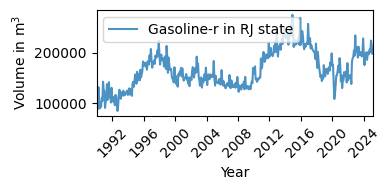

In [ ]:
i = np.random.randint(len(df))  # sort a random series

series = np.array(df.iloc[i]['series_value'])  # time series values
product = str.capitalize(df.iloc[i]['product']) # store the product´s name
state = df.iloc[i]['state_code'] # store the Brazilian state
start_timestamp = pd.to_datetime(df.iloc[i]['start_timestamp']) # When the series begins
end_timestamp = pd.to_datetime(df.iloc[i]['end_timestamp']) # When the series ends


# Generate the dates between the start and end timestamps
dates = pd.date_range(start=start_timestamp, periods=len(series), freq='MS')

plt.figure(figsize=(4, 2))
plt.plot(dates, series, alpha=0.8, label=f'{product} in {state} state')
plt.xlim(start_timestamp, end_timestamp)
plt.legend()
plt.ylabel('Volume in m$^3$')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('monthly_fuel_sales_state.png', dpi=300, bbox_inches='tight')

#Monthly oil and gas operations by state

Load the dataset:

In [11]:
result, flag = loader.monthly_operations_state()
df, metadata = loader.read_tsf(path_tsf=result)
df

Found 7 CSV files.
dataset downloaded at: ./monthly_oilgas_operations_by_state.tsf


,series_name,start_timestamp,end_timestamp,state_code,product,operation,series_value
0,T1,1997-01-01,2025-12-01,AL,petroleum,production,"[16691.0, 17684.0, 16639.0, 19108.0, 20665.0, ..."
1,T2,1997-01-01,2025-12-01,BA,petroleum,production,"[257582.0, 250455.0, 259712.0, 248491.0, 25124..."
2,T3,1997-01-01,2025-12-01,CE,petroleum,production,"[69006.0, 73759.0, 76851.0, 71571.0, 68377.0, ..."
3,T4,1997-01-01,2025-12-01,MA,petroleum,production,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,T5,1997-01-01,2025-12-01,RN,petroleum,production,"[435336.0, 429755.0, 439056.0, 432781.0, 42283..."
...,...,...,...,...,...,...,...
71,T72,2000-01-01,2025-03-01,AM,natural gas,available,"[11763.0, 9600.0, 14147.0, 111949997.0, 13965...."
72,T73,2000-01-01,2025-03-01,ES,natural gas,available,"[193569999.0, 189755704.0, 187629955.0, 190210..."
73,T74,2000-01-01,2025-03-01,RJ,natural gas,available,"[2236929999.0, 1999109995.0, 2449152002.0, 222..."
74,T75,2000-01-01,2025-03-01,SP,natural gas,available,"[33562.0, 37385.0, 24253.0, 23551.0, 29327.0, ..."


Metadata of the dataset "Monthly oil and gas operations by state":

In [ ]:
metadata

{'frequency': 'monthly',
 'horizon': 12,
 'missing_values': False,
 'equal_length': False}

Location of the dataset in the TSF format:

In [ ]:
result

'./monthly_oilgas_operations_by_state.tsf'

Plot of an example:

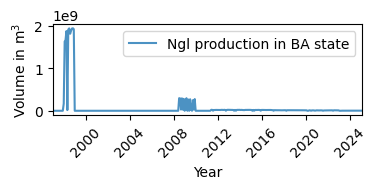

In [ ]:
i = np.random.randint(len(df))  # sort a random series

series = np.array(df.iloc[i]['series_value'])  # time series values
product = str.capitalize(df.iloc[i]['product']) # store the product´s name
operation = df.iloc[i]['operation'] # mudar para operation
state = df.iloc[i]['state_code'] # store the Brazilian state
start_timestamp = pd.to_datetime(df.iloc[i]['start_timestamp']) # When the series begins
end_timestamp = pd.to_datetime(df.iloc[i]['end_timestamp']) # When the series ends


# Generate the dates between the start and end timestamps
dates = pd.date_range(start=start_timestamp, periods=len(series), freq='MS')

plt.figure(figsize=(4, 2))
plt.plot(dates, series, alpha=0.8, label=f'{product} {operation} in {state} state')
plt.xlim(start_timestamp, end_timestamp)
plt.legend()
plt.ylabel('Volume in m$^3$')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('monthly_oilgas_operations_state.png', dpi=300, bbox_inches='tight')

# Fuel Classification
From the monthly fuel sales dataset

In [12]:
df = loader.fuel_type_classification()
df

dataset downloaded at: ./fuel_type_classification.tsf


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,label
0,0.937711,-0.804479,-1.002469,0.435951,-1.418243,-0.106512,-0.223090,-0.494080,0.061665,-0.726989,2.322176,1.018359,ethanol
1,-0.208960,-0.527648,0.125916,-0.801553,2.784311,1.251003,0.087244,-0.828619,-0.770111,-0.332958,-0.368035,-0.410590,ethanol
2,0.235901,-0.720729,-0.659616,-0.203005,-0.239643,-0.284093,1.720811,1.236119,-0.206170,0.966724,-2.272187,0.425889,ethanol
3,1.774912,1.331419,0.011724,1.084923,-1.878683,0.590058,-0.317771,-0.511967,-0.932614,-0.142796,-0.864949,-0.144255,ethanol
4,0.719951,0.110207,-1.210560,1.269346,-0.998101,1.264763,1.410154,-0.876278,-1.698492,0.057707,-0.299310,0.250613,ethanol
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14027,-0.246332,-0.235386,1.281190,-0.834135,-0.251258,0.792449,0.533027,0.531933,0.557656,1.366569,-1.745942,-1.749773,fuel oil
14028,0.751717,0.750766,0.773100,1.475436,-1.226989,-1.230316,-1.077303,-0.596883,1.416988,-1.237919,0.094999,0.106404,fuel oil
14029,-1.356786,-0.928350,0.867609,-1.500022,-0.311333,-0.301163,-0.900804,0.875237,0.304412,1.485472,0.303564,1.462165,fuel oil
14030,-1.006040,0.778139,0.204699,1.391171,0.203847,1.367757,-1.609280,-0.417273,0.151058,-1.610983,-0.419828,0.966732,fuel oil


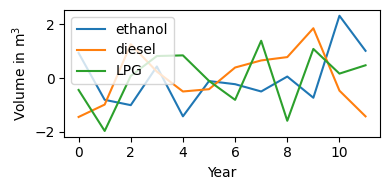

In [ ]:
series1 = np.array(df.iloc[0,:-1])
series2 = np.array(df.iloc[300,:-1])
series3 = np.array(df.iloc[1000,:-1])

plt.figure(figsize=(4, 2))
plt.plot(series1, label=df.iloc[0]['label'])
plt.plot(series2, label=df.iloc[300]['label'])
plt.plot(series3, label=df.iloc[1000]['label'])
plt.legend()
plt.ylabel('Volume in m$^3$')
plt.xlabel('Year')
plt.tight_layout()